In [1]:
import numpy as np
import pandas as pd

In [2]:
# Here we are loading the dataset, that has been proceesed through mobilenetv2 from
# layer block_14_add
# membership and distrobution of training, validation, and test set are pre determined via pseudo random methods
ABG_training_data = pd.read_csv("block_14_add_training_set.csv")
ABG_validation_data = pd.read_csv("block_14_add_validation_data.csv")
ABG_testing_data = pd.read_csv("block_14_add_testing_feature.csv")

In [3]:
# dropping all unknown values from the dataset
ABG_training_data = ABG_training_data.dropna()
ABG_validation_data = ABG_validation_data.dropna()
ABG_testing_data = ABG_testing_data.dropna()

In [4]:
#  The UMAP fit function only takes in numerical/char labels for this reason
#  In this csv file, 
#   Anthrophony is labeled as 1
#   Biophony is labeled as 2
#   Geophony is labeled as 3
#   Other is labeled as 4

In [5]:
ABG_training_data.Label.value_counts()  # number of datapoints in each class in training set

2    3086
1    1920
3    1705
4     330
Name: Label, dtype: int64

In [6]:
ABG_validation_data.Label.value_counts()  # number of datapoints in each class in validation set

1    200
2    200
3    200
4     50
Name: Label, dtype: int64

In [7]:
ABG_testing_data.Label.value_counts()  # number of datapoints in each class in testing set

1    50
2    50
3    50
4    50
Name: Label, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler  

In [9]:
scaler = StandardScaler().fit(ABG_training_data.drop("Label", axis = 1))  # normalizing based on training data 

In [10]:
# applying the normalization to the other datapoints 
scaled_training_set   = scaler.transform(ABG_training_data.drop("Label", axis = 1))    
scaled_validation_set = scaler.transform(ABG_validation_data.drop("Label", axis = 1))
scaled_testing_set    = scaler.transform(ABG_testing_data.drop("Label", axis = 1))

In [11]:
trainingDataLabel = [''] * 7041 # creating char labels that UMAP can accept 
for i in range(0,1920):
    trainingDataLabel[i] = 'A'
for i in range(1920,5006):
    trainingDataLabel[i] = 'B'
for i in range(5006,6711):
    trainingDataLabel[i] = 'G'
for i in range(6711,7041):
    trainingDataLabel[i] = 'O'

In [12]:
ValidationDataLabel = [''] * 650  # creating char labels that UMAP can accept 
for i in range(0,200):
    ValidationDataLabel[i] = 'A'
for i in range(200,400):
    ValidationDataLabel[i] = 'B'
for i in range(400,600):
    ValidationDataLabel[i] = 'G'
for i in range(600,650):
    ValidationDataLabel[i] = 'O'

In [13]:
testDataLabel = [''] * 200  # creating char labels that UMAP can accept 
for i in range(0,50):
    testDataLabel[i] = 'A'
for i in range(50,100):
    testDataLabel[i] = 'B'
for i in range(100,150):
    testDataLabel[i] = 'G'
for i in range(150,200):
    testDataLabel[i] = 'O'

In [14]:
combinedLabel = trainingDataLabel + ValidationDataLabel;  # combining labels for cross-validation for gridsearch

In [15]:
import umap  
reducer   = umap.UMAP(random_state=42, n_components=2, n_neighbors=19, min_dist = 0.6)  # init umap and set param
embedding = reducer.fit(scaled_training_set, trainingDataLabel)  # this is where umap learns about our data
# through supervised learning

# From here umap applies the metrics it learned from the data set to the rest of the data set
Training_Embedding   = reducer.transform(scaled_training_set) 
Validation_Embedding = reducer.transform(scaled_validation_set)
Testing_Embedding    = reducer.transform(scaled_testing_set)

/Users/jcalderonchavez/opt/miniconda3/lib/python3.8/site-packages/umap/umap_.py:2449: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  y_ = check_array(y, ensure_2d=False)[index]


inside function
   (0, 5)	0.25795013
  (0, 358)	0.21695027
  (0, 631)	0.23717023
  (0, 755)	0.30954933
  (0, 1067)	0.2476061
  (0, 1242)	0.2271341
  (0, 1557)	0.23776315
  (0, 1584)	0.23672196
  (0, 1873)	0.30496362
  (0, 1975)	0.23026149
  (0, 3429)	0.23888291
  (0, 4039)	0.21815468
  (0, 4078)	0.23654447
  (0, 5600)	0.22924463
  (0, 5671)	0.22030115
  (0, 5789)	0.22827876
  (0, 5911)	0.23795821
  (0, 6044)	0.21819
  (0, 6506)	0.22385424
  (1, 178)	0.20168363
  (1, 410)	0.27207503
  (1, 787)	0.27551818
  (1, 1119)	0.21159971
  (1, 1253)	0.23787652
  (1, 1323)	0.2507785
  :	:
  (648, 6649)	0.26115707
  (648, 6711)	0.2493716
  (648, 6870)	0.30556926
  (648, 6896)	0.21367516
  (648, 6936)	0.20943153
  (648, 7008)	0.20431893
  (649, 3310)	0.24912873
  (649, 5267)	0.25972977
  (649, 5274)	0.22135015
  (649, 5298)	0.2147775
  (649, 5459)	0.24089493
  (649, 5478)	0.24002907
  (649, 6208)	0.21478169
  (649, 6347)	0.21222289
  (649, 6713)	0.24080919
  (649, 6723)	0.2150115
  (649, 6724)	0.3539

Text(0.5, 1.0, 'UMAP Feature Reduction on ABGO Dataset')

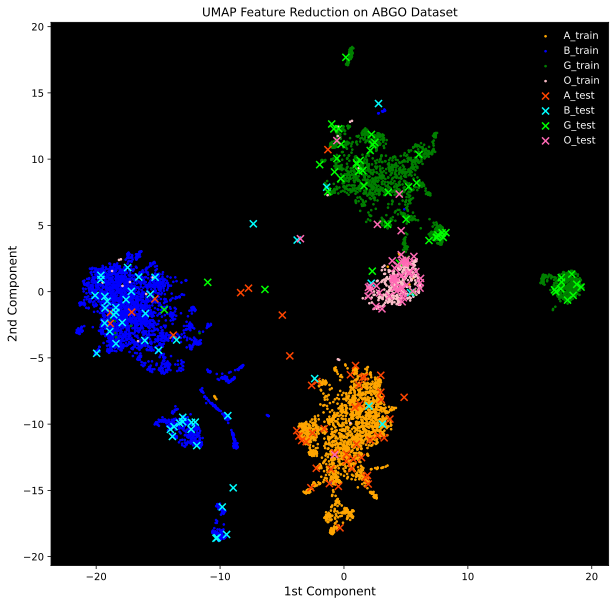

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

scatter_x = np.array(Training_Embedding[:,0])
scatter_y = np.array(Training_Embedding[:,1])
cdict = {'A_train': 'green', 'Bio_training': 'blue', 'Geo_training': 'purple', 'Other_training': 'chartreuse' }

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('black')

# ploting the umap training data
ax.scatter(Training_Embedding[0:1919, 0],     Training_Embedding[0:1919,1],     c = 'orange', alpha= 1,  label = "A_train", s = 3)
ax.scatter(Training_Embedding[1920:5005, 0],  Training_Embedding[1920:5005,1],  c = 'blue',  alpha= 1,  label = "B_train", s = 3)
ax.scatter(Training_Embedding[5006:6710, 0],  Training_Embedding[5006:6710,1],  c = 'green',alpha=1, label = "G_train", s = 3)
ax.scatter(Training_Embedding[6711: 7040, 0], Training_Embedding[6711: 7040,1], c = 'pink', alpha=1, label = "O_train", s = 3)

# ploting the umap testing data
ax.scatter(Testing_Embedding[0:49, 0],      Testing_Embedding[0:49,1],      c = 'orangered',   label = "A_test", s = 50, marker="x")
ax.scatter(Testing_Embedding[50:99, 0],     Testing_Embedding[50:99,1],     c = 'cyan', label = "B_test", s = 50, marker="x")
ax.scatter(Testing_Embedding[99:149, 0],    Testing_Embedding[99:149,1],    c = 'lime', label = "G_test", s = 50, marker="x")
ax.scatter(Testing_Embedding[150: 199, 0],  Testing_Embedding[150: 199,1],  c = 'hotpink',label = "O_test", s = 50, marker="x")

# creating the labels
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.legend(markerscale=1, frameon=False, labelcolor='w')

plt.xlabel('1st Component', fontsize=12)
plt.ylabel('2nd Component', fontsize=12)
plt.title('UMAP Feature Reduction on ABGO Dataset', fontsize=12)

In [17]:
combined_data = np.vstack((Training_Embedding, Validation_Embedding)) # combining labels for cross-validation for gridsearch

In [18]:
inValidation = [0] * 7691 # here we are distingishing which datapoint of in the validation set
for i in range(0, 7041):
    inValidation[i] = -1
    
for i in range(7041, 7691):
    inValidation[i] = 0   

In [19]:
from sklearn.model_selection import PredefinedSplit
ps = PredefinedSplit(test_fold=inValidation)

In [20]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=ps) 
  
# fitting the model for grid search 
grid.fit(combined_data, combinedLabel) 

Fitting 1 folds for each of 50 candidates, totalling 50 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.797, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.797, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.797, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.800, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.797, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.783, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.797, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.758, total=   0.3s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.797, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.2min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [22]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [23]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

grid_predictions = grid.predict(Testing_Embedding) 
print(classification_report(testDataLabel, grid_predictions)) # print classification report 
print(accuracy_score(testDataLabel, grid_predictions))

              precision    recall  f1-score   support

           A       0.91      0.78      0.84        50
           B       0.78      0.86      0.82        50
           G       0.85      0.88      0.86        50
           O       0.88      0.88      0.88        50

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

0.85


In [24]:
print(confusion_matrix(testDataLabel, grid_predictions))

[[39  9  2  0]
 [ 3 43  2  2]
 [ 0  2 44  4]
 [ 1  1  4 44]]
